In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [341]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

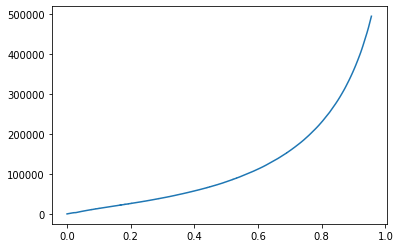

In [342]:

ethafoam = pd.read_csv('17_ethafoam_compression.csv', on_bad_lines='skip')
ethafoam_data = np.array(ethafoam)[5:,:].astype(float)

# linear region
ethafoam_data = ethafoam_data[ethafoam_data[:,2] > 1]  # remove initial setting data points
ethafoam_data = ethafoam_data[ethafoam_data[:,2] < 1e3]  # remove final data points
ethafoam_data -= ethafoam_data[0]

diameter = 50.75 / 1000 # m
ethafoam_thickness = 25 # mm
ethafoam_area = np.pi * (diameter/2)**2 # mm^2

ethafoam_strain = ethafoam_data[:,1] / ethafoam_thickness
ethafoam_stress = ethafoam_data[:,2] / ethafoam_area

plt.plot(ethafoam_strain, ethafoam_stress)



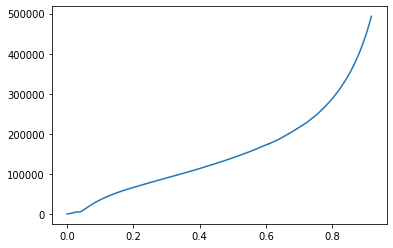

In [343]:

polystyrene_df = pd.read_csv('17_polystyrene_compression.csv', on_bad_lines='skip')
polystyrene_data = np.array(polystyrene_df)[5:,:].astype(float)

polystyrene_data = polystyrene_data[polystyrene_data[:,2] > 1] # remove initial setting data points
polystyrene_data = polystyrene_data[polystyrene_data[:,2] < 1e3] # remove final data points
polystyrene_data -= polystyrene_data[0,:]  # subtract initial setting data points

diameter = 50.75 / 1000 # m
polystyrene_thickness = 13.5 # mm
polystyrene_area = np.pi * (diameter/2)**2 # mm^2

polystyrene_strain = polystyrene_data[:,1] / polystyrene_thickness
polystyrene_stress = polystyrene_data[:,2] / polystyrene_area

plt.plot(polystyrene_strain, polystyrene_stress)


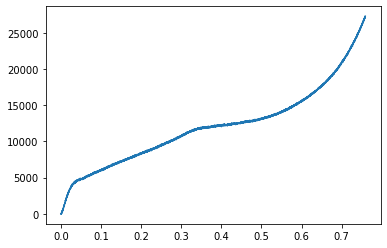

In [344]:

polyurethane_df = pd.read_csv('17_polyurethane_compression.csv', on_bad_lines='skip')
polyurethane_data = np.array(polyurethane_df)[12:,:].astype(float)

polyurethane_data = polyurethane_data[polyurethane_data[:,2] > 1] # remove initial data points
polyurethane_data = polyurethane_data[polyurethane_data[:,2] < 1e4] # remove final data points
polyurethane_data -= polyurethane_data[0,:] # subtract initial data point

diameter = 50.75 / 1000 # m
polyurethane_thickness = 25.07 # mm
polyurethane_area = np.pi * (diameter/2)**2 # mm^2

polyurethane_strain = polyurethane_data[:,1] / polyurethane_thickness
polyurethane_stress = polyurethane_data[:,2] / polyurethane_area

plt.plot(polyurethane_strain, polyurethane_stress)


(0.0, 50000.0)

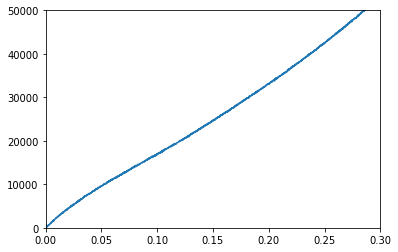

In [345]:

white_foam_df = pd.read_csv('17_white_foam_compression.csv', on_bad_lines='skip')
white_foam_data = np.array(white_foam_df)[12:,:].astype(float)

white_foam_data = white_foam_data[white_foam_data[:,1] > 1] # remove initial data points
white_foam_data = white_foam_data[white_foam_data[:,2] < 6e2] # remove final data points
white_foam_data -= white_foam_data[0,:] # subtract initial data point

white_foam_thickness = 20.37 # mm
white_foam_area = 1237.83440723 * 1e-6 # m^2

white_foam_strain = white_foam_data[:,1] / white_foam_thickness
white_foam_stress = white_foam_data[:,2] / white_foam_area

plt.plot(white_foam_strain, white_foam_stress)
plt.xlim(0,0.3)
plt.ylim(0,0.05e6)

In [346]:
# plot the 4 materials on the same graph

plt.plot(ethafoam_strain, ethafoam_stress * 1e-6, label='Ethafoam')
plt.plot(polystyrene_strain, polystyrene_stress * 1e-6, label='Polystyrene')
plt.plot(polyurethane_strain, polyurethane_stress * 1e-6, label='Polyurethane')
plt.plot(white_foam_strain, white_foam_stress * 1e-6, label='White Foam')

plt.ylabel('Stress (MPa)')
plt.xlabel('Strain')
plt.legend()

plt.savefig('stress_vs_strain.png', dpi=300)
plt.show()

In [ ]:
def closest_index(array, value):
    return np.abs(array - value).argmin()

def performance_index(strain_data, stress_data, fragility):
    # find the index of the strain that corresponds to the fragility
    fragility_index = closest_index(stress_data, fragility)
    # calculate the performance index
    performance_index = np.trapz(stress_data[:fragility_index], strain_data[:fragility_index])
    return performance_index

performance_index(white_foam_strain, white_foam_stress, 0.04e6)


4792.752902392191

In [ ]:

def draw_performance_curve(strain_data, stress_data, label):
    fragilities = np.linspace(stress_data[0], stress_data[-1], 100)
    performance_indices = np.zeros(len(fragilities))
    
    for i, fragility in enumerate(fragilities):
        performance_indices[i] = performance_index(strain_data, stress_data, fragility)
    
    plt.plot(fragilities * 1e-6, performance_indices, label = label)
    
    return fragilities, performance_indices


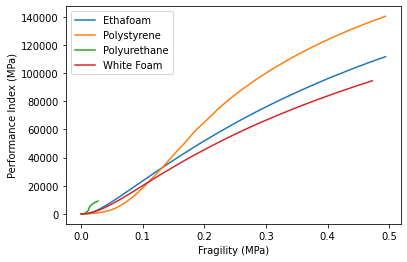

In [ ]:
# draw the performance curves for each material
draw_performance_curve(ethafoam_strain, ethafoam_stress, 'Ethafoam')
draw_performance_curve(polystyrene_strain, polystyrene_stress, 'Polystyrene')
draw_performance_curve(polyurethane_strain, polyurethane_stress, 'Polyurethane')
draw_performance_curve(white_foam_strain, white_foam_stress, 'White Foam')

plt.ylabel('Performance Index (MPa)')
plt.xlabel('Fragility (MPa)')
plt.legend()

plt.savefig('performance_vs_fragility',dpi = 300)
plt.show()